In [1]:
import numpy as np
import pandas as pd
import pickle

from isttc.scripts.cfg_global import project_folder_path

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'synthetic_dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau_comp_time\\full_signal\\'

fig_folder = results_folder
save_fig = True

In [3]:
def get_compute_time_df(acf_dict_, signal_len_, method_, alphas_, fr_values_, taus_ms_, bin_size_=50):
    data = []
    for unit_id, unit_data in acf_dict_.items():
        data.append({
            'unit_id': unit_id,
            'elapsed_time_acf_sec': unit_data['elapsed_time_acf'],
            'elapsed_time_tau_fit_sec': unit_data['elapsed_time_tau_fit']
            
        })
    compute_time_df = pd.DataFrame(data)
    compute_time_df['method'] = method_
    compute_time_df['bin_size'] = bin_size_
    compute_time_df['duration_s'] = signal_len_
    compute_time_df['fr'] = fr_values_
    compute_time_df['alpha'] = alphas_
    compute_time_df['tau_ms_true'] = taus_ms_

    rows_with_nans_df = compute_time_df[compute_time_df.isna().any(axis=1)]
    n_rows_with_nan = len(rows_with_nans_df)
    print(f'N rows with NaNs {n_rows_with_nan}')
    
    return compute_time_df

In [ ]:
with open(dataset_folder + 'spike_trains.pkl', 'rb') as f:
    data = pickle.load(f)

spike_trains = data['spike_trains']
alphas = data['alphas']
fr_values = data['fr_values']
taus_ms = data['tau_ms']
duration_ms = data['duration_ms']

print(f'n spike trains {len(spike_trains)}, len {spike_trains[0][-1]/1000}, duration_ms {duration_ms}')

In [ ]:
with open(results_folder + 'acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

with open(results_folder + 'acf_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

acf_tau_full_df = get_compute_time_df(acf_full_dict, 600, 'acf_full', alphas, fr_values, taus_ms, bin_size_=50)
isttc_tau_full_df = get_compute_time_df(isttc_full_dict, 600, 'isttc_full', alphas, fr_values, taus_ms, bin_size_=50)

tau_all_long_df = pd.concat([acf_tau_full_df, isttc_tau_full_df])
tau_all_long_df.reset_index(inplace=True, drop=True)
tau_all_long_df['total_time_sec'] = tau_all_long_df['elapsed_time_tau_fit_sec'] + tau_all_long_df['elapsed_time_acf_sec']
tau_all_long_df['elapsed_time_tau_fit_sec_log10'] = np.log10(tau_all_long_df['elapsed_time_tau_fit_sec'])
tau_all_long_df['elapsed_time_acf_sec_log10'] = np.log10(tau_all_long_df['elapsed_time_acf_sec'])
tau_all_long_df['total_time_sec_log10'] = np.log10(tau_all_long_df['total_time_sec'])

tau_all_long_df.to_csv(results_folder + 'compute_time_full_long_df_all_units.csv')
tau_all_long_df.to_pickle(results_folder + 'compute_time_full_long_df_all_units.pkl')

tau_all_long_df

In [ ]:
with open(results_folder + 'var_len\\acf_full_50ms_20lags_dict_60ms.pkl', "rb") as f:
    acf_full_dict_60 = pickle.load(f)

with open(results_folder + 'var_len\\acf_full_50ms_20lags_dict_150ms.pkl', "rb") as f:
    acf_full_dict_150 = pickle.load(f)

with open(results_folder + 'var_len\\acf_full_50ms_20lags_dict_300ms.pkl', "rb") as f:
    acf_full_dict_300 = pickle.load(f)

with open(results_folder + 'var_len\\acf_full_50ms_20lags_dict_450ms.pkl', "rb") as f:
    acf_full_dict_450 = pickle.load(f)

with open(results_folder + 'var_len\\acf_isttc_full_50ms_20lags_dict_60ms.pkl', "rb") as f:
    isttc_full_dict_60 = pickle.load(f)

with open(results_folder + 'var_len\\acf_isttc_full_50ms_20lags_dict_150ms.pkl', "rb") as f:
    isttc_full_dict_150 = pickle.load(f)

with open(results_folder + 'var_len\\acf_isttc_full_50ms_20lags_dict_300ms.pkl', "rb") as f:
    isttc_full_dict_300 = pickle.load(f)

with open(results_folder + 'var_len\\acf_isttc_full_50ms_20lags_dict_450ms.pkl', "rb") as f:
    isttc_full_dict_450 = pickle.load(f)


acf_tau_full_df_60 = get_compute_time_df(acf_full_dict_60, 60, 'acf_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)
acf_tau_full_df_150 = get_compute_time_df(acf_full_dict_150, 150, 'acf_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)
acf_tau_full_df_300 = get_compute_time_df(acf_full_dict_300, 300, 'acf_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)
acf_tau_full_df_450 = get_compute_time_df(acf_full_dict_450, 450, 'acf_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)

isttc_tau_full_df_60 = get_compute_time_df(isttc_full_dict_60, 60, 'isttc_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)
isttc_tau_full_df_150 = get_compute_time_df(isttc_full_dict_150, 150, 'isttc_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)
isttc_tau_full_df_300 = get_compute_time_df(isttc_full_dict_300, 300, 'isttc_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)
isttc_tau_full_df_450 = get_compute_time_df(isttc_full_dict_450, 450, 'isttc_full', alphas[:1000], fr_values[:1000], taus_ms[:1000], bin_size_=50)

tau_all_long_len_df = pd.concat([acf_tau_full_df_60, acf_tau_full_df_150, acf_tau_full_df_300, acf_tau_full_df_450, 
                            isttc_tau_full_df_60, isttc_tau_full_df_150, isttc_tau_full_df_300, isttc_tau_full_df_450])
tau_all_long_len_df.reset_index(inplace=True, drop=True)
tau_all_long_len_df['total_time_sec'] = tau_all_long_df['elapsed_time_tau_fit_sec'] + tau_all_long_len_df['elapsed_time_acf_sec']
tau_all_long_len_df['elapsed_time_tau_fit_sec_log10'] = np.log10(tau_all_long_len_df['elapsed_time_tau_fit_sec'])
tau_all_long_len_df['elapsed_time_acf_sec_log10'] = np.log10(tau_all_long_len_df['elapsed_time_acf_sec'])
tau_all_long_len_df['total_time_sec_log10'] = np.log10(tau_all_long_len_df['total_time_sec'])

tau_all_long_len_df = pd.concat([tau_all_long_len_df, tau_all_long_df.query('unit_id < 1000').copy()])
tau_all_long_len_df.reset_index(inplace=True, drop=True)

tau_all_long_len_df.to_csv(results_folder + 'var_len\\compute_time_full_long_df_1000_units.csv')
tau_all_long_len_df.to_pickle(results_folder + 'var_len\\compute_time_full_long_df_1000_units.pkl')

tau_all_long_len_df

### Extra dfs for plotting 

In [4]:
tau_all_long_df = pd.read_pickle(results_folder + 'compute_time_full_long_df_all_units.pkl')

In [ ]:
tau_all_long_df

In [11]:
tau_all_long_df_subset = tau_all_long_df[['unit_id', 'method', 'total_time_sec']].copy()
tau_all_long_df_subset

,unit_id,method,total_time_sec
0,0,acf_full,0.009946
1,1,acf_full,0.009949
2,2,acf_full,0.011264
3,3,acf_full,0.010769
4,4,acf_full,0.008032
...,...,...,...
199995,99995,isttc_full,0.145345
199996,99996,isttc_full,0.317157
199997,99997,isttc_full,0.311670
199998,99998,isttc_full,0.074400


In [17]:
thresholds = [100, 200, 300, 400, 500, 1000, 2000, 5000, 10000, 100000]
n_reps = 100   # number of repetitions

rows = []

for n in thresholds:
    for method, df_method in tau_all_long_df_subset.groupby("method"):
        units = df_method["unit_id"].unique()

        # run repeated sampling
        total_sec_list = []
        for _ in range(n_reps):
            sampled_units = np.random.choice(units, size=n, replace=False)
            df_sample = df_method[df_method.unit_id.isin(sampled_units)]
            total_sec_list.append(df_sample["total_time_sec"].sum())

        # median across repetitions
        rows.append({
            "method": method,
            "n_units": n,
            "median_total_time_sec": np.median(total_sec_list)
        })

result_df = pd.DataFrame(rows)
result_df["median_total_time_min"] = result_df["median_total_time_sec"] / 60
result_df["median_total_time_h"] = result_df["median_total_time_min"] / 60

result_df


,method,n_units,median_total_time_sec,median_total_time_min,median_total_time_h
0,acf_full,100,1.076733,0.017946,0.000299
1,isttc_full,100,28.419920,0.473665,0.007894
2,acf_full,200,2.106416,0.035107,0.000585
3,isttc_full,200,56.785652,0.946428,0.015774
4,acf_full,300,3.286364,0.054773,0.000913
5,isttc_full,300,85.162036,1.419367,0.023656
6,acf_full,400,4.380410,0.073007,0.001217
7,isttc_full,400,113.955768,1.899263,0.031654
8,acf_full,500,5.562826,0.092714,0.001545
9,isttc_full,500,142.459677,2.374328,0.039572


In [13]:
total_time_df = tau_all_long_df.groupby(by='method', as_index=False)[['elapsed_time_acf_sec', 'elapsed_time_tau_fit_sec', 'total_time_sec']].sum()
total_time_df['total_time_min'] = total_time_df['total_time_sec'] / 60
total_time_df['total_time_h'] = total_time_df['total_time_min'] / 60
total_time_df

,method,elapsed_time_acf_sec,elapsed_time_tau_fit_sec,total_time_sec,total_time_min,total_time_h
0,acf_full,172.964413,1238.461011,1411.425424,23.523757,0.392063
1,isttc_full,27696.602776,865.135300,28561.738077,476.028968,7.933816


### Plots

In [14]:
color_acf_full = '#718190'
color_isttc_full = '#1ba9e2' 
color_pearson_trail_avg = '#f4a91c' 
color_sttc_trail_avg =  '#a49fce' 
color_sttc_trail_concat = '#955da2' 

colors = [color_acf_full, color_isttc_full, color_pearson_trail_avg, color_sttc_trail_concat]

colors_full = [color_acf_full, color_isttc_full]

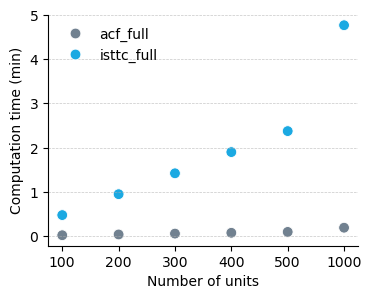

In [20]:
fig, axes = plt.subplots(1,1, figsize=(4,3))

sns.scatterplot(x=result_df['n_units'].astype(str), y='median_total_time_min', hue='method', 
                data=result_df[result_df['n_units'] <= 1000], palette=colors_full, s=60)
axes.grid(True, which="both", axis='y', linestyle="--", linewidth=0.5, alpha=0.7)
axes.legend(frameon=False)
#axes.set_ylim([-0.5, 5])
axes.set_xlabel('Number of units')
axes.set_ylabel('Computation time (min)')

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'full_signal_comp_time_n_units.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'full_signal_comp_time_n_units.svg' , bbox_inches='tight')

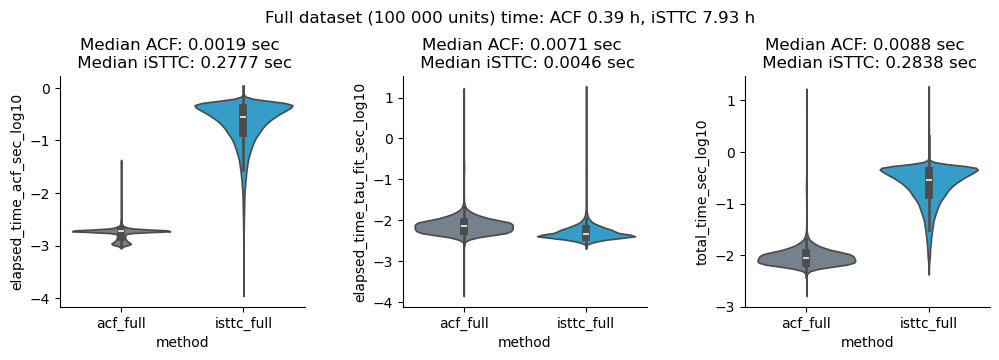

In [21]:
fig, axes = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(x='method', y='elapsed_time_acf_sec_log10', hue='method',
               palette=colors_full, data=tau_all_long_df , cut=0, ax=axes[0])
axes[0].set_title(f"Median ACF: {tau_all_long_df.groupby('method')['elapsed_time_acf_sec'].median()['acf_full']:.4f} sec \n Median iSTTC: {tau_all_long_df.groupby('method')['elapsed_time_acf_sec'].median()['isttc_full']:.4f} sec")

sns.violinplot(x='method', y='elapsed_time_tau_fit_sec_log10', hue='method',
               palette=colors_full, data=tau_all_long_df , cut=0, ax=axes[1])
axes[1].set_title(f"Median ACF: {tau_all_long_df.groupby('method')['elapsed_time_tau_fit_sec'].median()['acf_full']:.4f} sec \n Median iSTTC: {tau_all_long_df.groupby('method')['elapsed_time_tau_fit_sec'].median()['isttc_full']:.4f} sec")

sns.violinplot(x='method', y='total_time_sec_log10', hue='method',
               palette=colors_full, data=tau_all_long_df , cut=0, ax=axes[2])
axes[2].set_title(f"Median ACF: {tau_all_long_df.groupby('method')['total_time_sec'].median()['acf_full']:.4f} sec \n Median iSTTC: {tau_all_long_df.groupby('method')['total_time_sec'].median()['isttc_full']:.4f} sec")

for ax in axes.flat:
    sns.despine(ax=ax)

fig.suptitle(f'Full dataset (100 000 units) time: ACF {total_time_df.query('method == "acf_full"')['total_time_h'].values[0]:.2f} h, iSTTC {total_time_df.query('method == "isttc_full"')['total_time_h'].values[0]:.2f} h', y=1.1)
    
#axes[0].legend(frameon=False)

if save_fig:
    plt.savefig(fig_folder + 'full_signal_comp_time.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'full_signal_comp_time.svg' , bbox_inches='tight')